# Data Project Proposal
<li><font size="4">Class:DAV 5300 Computational Mathematics and Statistics</font>
<li><font size="4">Director:Jason Bryer </font>
<li><font size="4">Author:Zhengnan Li, Qing Dou, Yu Wang</font>

### Data Preparation

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
chips = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV_5300/main/Data_Project/src/chip_dataset.csv')
chips['Release Date'] = pd.to_datetime(chips['Release Date'])
chips

,Product,Type,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,CPU,2007-02-20,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,CPU,2018-09-06,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,CPU,2013-09-01,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,CPU,2011-05-03,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,CPU,2013-09-01,22,95,160.0,1400,2400,Intel
...,...,...,...,...,...,...,...,...,...
3494,ATI FirePro V7800,GPU,2010-04-26,40,150,334.0,2154,700,ATI
3495,NVIDIA Tegra 3 GPU,GPU,2011-11-09,40,20,80.0,10,416,NVIDIA
3496,NVIDIA Playstation 3 GPU 28nm,GPU,2013-06-03,28,21,68.0,302,550,NVIDIA
3497,NVIDIA Quadro 3000M,GPU,2011-02-22,40,75,332.0,1950,450,NVIDIA


### Research question 

- Research Questions:  
__How do process size, TDP, die size, and the number of transistors influence the operating frequency (Freq) of CPUs from different vendors?__

- Explaination:  
This question is designed to explore the relationship between several key technical specifications of CPUs and their performance metric (operating frequency), which is crucial for understanding efficiency and performance trade-offs in CPU design.
How do process size, TDP, die size, and the number of transistors influence the operating frequency (Freq) of CPUs from different vendors?

### Cases 

The cases in our dataset are individual Chip performance. Each row represents a distinct chip performance, with the dataset containing 3499 cases in total.

In [2]:
chips.shape

(3499, 9)

### Variables

In order to better understand the meaning of the table. Here is the explaination of each column
| Variable       | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| Product        | Description of the products.                                                                  |
| Type           | Classification of CPU and GPU.                                                                |
| Release Date   | The date of the product publish.                                                              |
| Process Size   | The size of the features (the elements that make up the transistors) in nanometers (nm).      |
| TDP (W)        | Thermal design power, the theoretical maximum amount of heat generated by a CPU or GPU.       |
| Die Size       | The physical dimensions of a bare die, representing the die size of a specific chip.          |
| Transistors    | Tiny electronic switches that can be turned on or off by applying a voltage to their terminals.|
| Freq           | The clock rate of a CPU, normally determined by the frequency of an oscillator crystal.       |
| Vendor         | The company that produces the chip.                                                            |


### Data collection

Data was compiled from dataset wbesite which is about hardware review.

### Type of study 

This study is observational. The data were collected without manipulating the variables, observing the characteristics of CPUs as they have been released by their vendors.

### Data Source 

Data was compiled from dataset wbesite which is about hardware review. Click the link to see the dataset.  
[Chip of CPU and GPU](https://www.heywhale.com/mw/dataset/64dc9b5000151985794c41a9/content)

### Describe your variables?

- Quantitative: Process Size, TDP, Die Size, Transistors, Freq.
- Qualitative: Product, Type, Release Date, Vendor.

### Relevant summary statistics 

 #### Summary statistics
- For quantitative variables:

In [3]:
summary_stats = chips[['Process Size', 'TDP', 'Die Size', 'Transistors', 'Freq']].describe()
print(summary_stats)

       Process Size          TDP     Die Size   Transistors         Freq
count     3499.0000  3499.000000  3367.000000   3499.000000  3499.000000
mean        53.6499    83.959703   198.843184   2119.450700  1544.539869
std         40.3186    77.415199   129.434892   4245.752711  1006.386748
min          7.0000     1.000000     1.000000     10.000000   100.000000
25%         28.0000    35.000000   110.000000    210.000000   650.000000
50%         40.0000    65.000000   160.000000    716.000000  1230.000000
75%         80.0000   100.000000   246.000000   1950.000000  2400.000000
max        250.0000   900.000000   826.000000  54200.000000  4700.000000


- For qualitative variables:

In [4]:
def qualitative(df, column_name):
    
    unique_values = df[column_name].value_counts()
    return unique_values
unique_vendors = qualitative(chips, 'Vendor')
unique_type = qualitative(chips, 'Type')
unique_release_date = qualitative(chips, 'Release Date')
print(unique_vendors)
print("--------------------------")
print(unique_type)
print("--------------------------")

Vendor
AMD       1420
NVIDIA     920
Intel      842
ATI        309
Other        8
Name: count, dtype: int64
--------------------------
Type
GPU    1824
CPU    1675
Name: count, dtype: int64
--------------------------


#### Visualizations

For visualizations relevant to our research question, scatter plots can effectively show the relationship between the CPU's operating frequency (Freq) and each of the following: Process Size, TDP, Die Size, and the number of Transistors. Coloring these plots by the Vendor can provide insights into any differences between CPU manufacturers.

- Vendors  
Explore the distribution of vendors

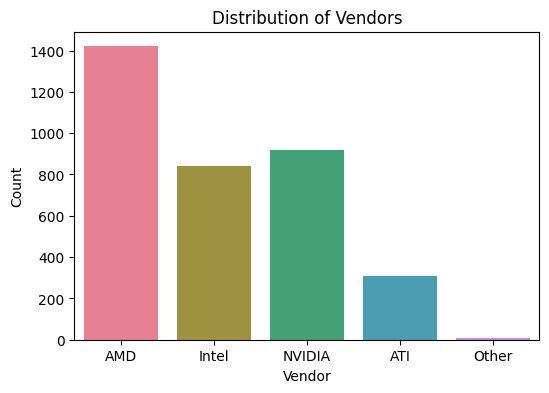

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(
x='Vendor', data=chips, palette='husl', hue='Vendor', legend=False
)
plt.title('Distribution of Vendors')
# Set labels and title
plt.xlabel('Vendor')
plt.ylabel('Count')
plt.show()

- Types

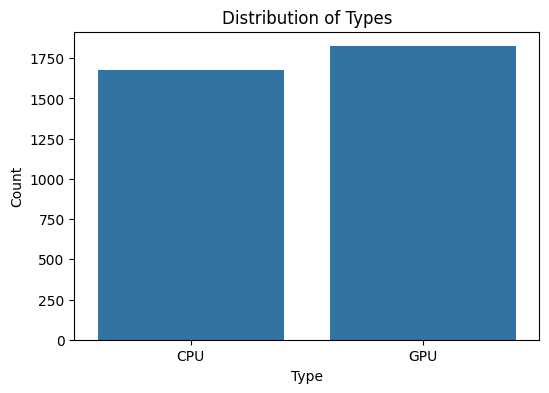

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=chips)
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

- Quantitative variables distribution and relationship between vendors and release date

ValueError: Could not interpret value `Year` for `x`. An entry with this name does not appear in `data`.

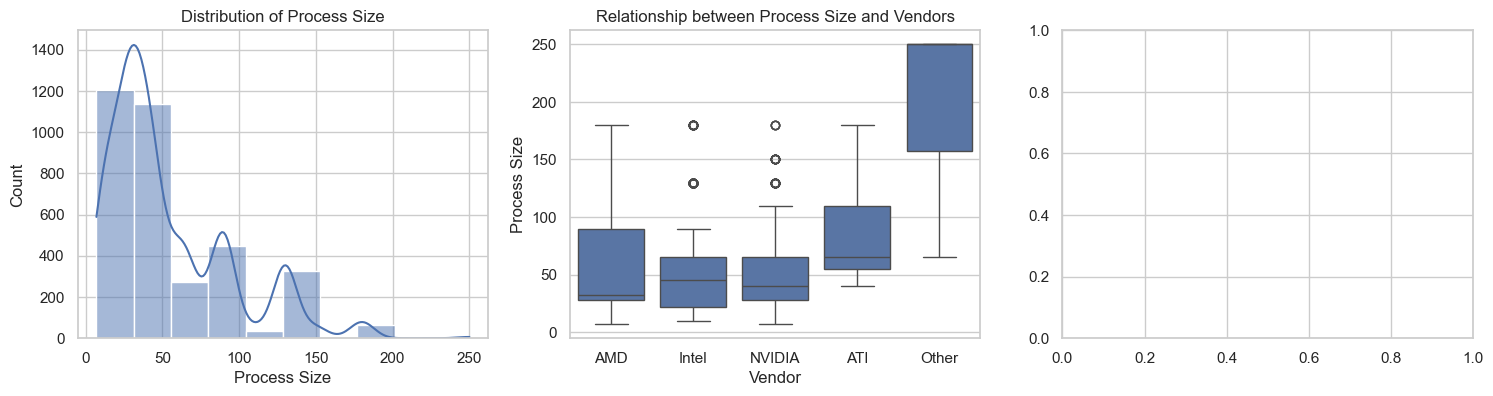

In [7]:
variables = ['Process Size', 'TDP', 'Transistors', 'Die Size', 'Freq']  
sns.set(style="whitegrid")

for var in variables:
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))  
    
    # set quantitative variables distribution
    sns.histplot(data=chips, x=var, kde=True, bins=10, ax=axs[0])
    axs[0].set_title(f'Distribution of {var}')
    axs[0].set_xlabel(var)
    axs[0].set_ylabel('Count')
    
    # set the relationship between quantitative variables and vendors
    sns.boxplot(x='Vendor', y=var, data=chips, ax=axs[1])
    axs[1].set_title(f'Relationship between {var} and Vendors')
    axs[1].set_xlabel('Vendor')
    axs[1].set_ylabel(var)
    
    # set the relationship between quantitative variables and release date
    sns.scatterplot(x='Year', y=var, data=chips, hue='Type', style='Type', s=100, alpha=0.7, ax=axs[2])
    axs[2].set_title(f'Relationship between {var} and Release Date')
    axs[2].set_xlabel('Release Year')
    axs[2].set_ylabel(var)
    
    plt.tight_layout() 
    plt.show()

- Pairplot for quantitative variables.

In [ ]:
sns.pairplot(chips, hue='Type', diag_kind='kde')
plt.suptitle('Pairplot for Numeric Features', y=1.02)
plt.show()

- Heatmap for quantitative variables.

In [ ]:
numerical_cols = chips.select_dtypes(include=['float64', 'int64']).columns

corr = chips[numerical_cols].corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()